# Palmer Penguins

This notebook contains an analysis of the Palmer penguin dataset (Horst AM, Hill AP, Gorman KB, 2020). This dataset was created as a intro dataset for data analysis and exploration. 
- https://allisonhorst.github.io/palmerpenguins/
- https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv

First read in the dataset from a csv file. This can be done with a package called pandas. Pandas is a data analysis library for Python.
- https://pandas.pydata.org/docs/getting_started/overview.html.



In [1]:
import pandas as pd

df = pd.read_csv("./palmerpenguins_dataset.csv")

Pandas has read the dataset in as a dataframe ie a two dimensional array - rows and columns. 
- https://pythonbasics.org/pandas-dataframe/
- https://pandas.pydata.org/docs/reference/frame.html

In [2]:
# view a small version (top and bottom) of the table in the csv file
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
# view the first row in the dataframe
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

We can see what datatypes are in the dataframe:

In [30]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Now have a look inside the dataframe at the headers:

In [31]:
header = df.columns.tolist()
print(header)

['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']


We can see the column headings, one of which is sex. Lets try make a barchart to see how many of the penguins in the dataset are male and how many are female. **not working, need to count number of male and number of female first somehow. nunique?
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html

In [32]:
df.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

This has counted the number of unique entries in each column. I need to count how many of each unique entries there are. Maybe with Dataframe.count:
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html

In [33]:
df.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
dtype: int64

There must be missing entries as some columns have more entries than others. 

The function "value_counts()" counts the number of unique values in a column.
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html#pandas.DataFrame.value_counts

In [34]:
gender_count = df['sex'].value_counts()
print(gender_count)

sex
MALE      168
FEMALE    165
Name: count, dtype: int64


Pandas has a buoilt in plot function 'plot'. This uses another package call matplotlib.

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html

<Axes: xlabel='sex'>

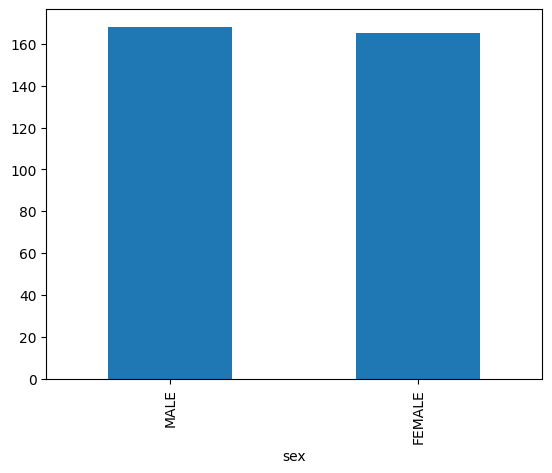

In [55]:
gender_count.plot.bar(x='sex')

Species might be a better thing to barchart ...

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


<Axes: xlabel='species'>

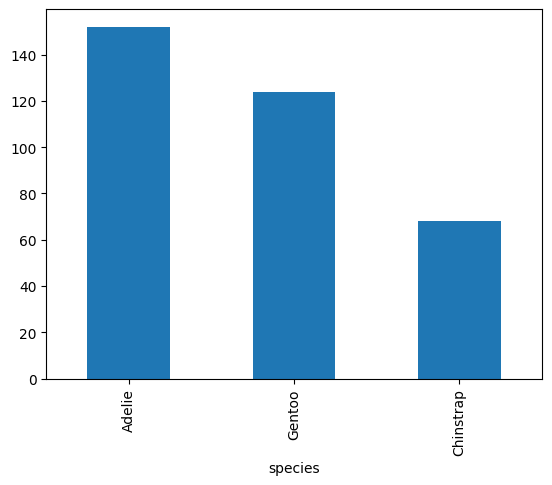

In [53]:
species_count = df['species'].value_counts()
print(species_count)

# plot
species_count.plot.bar(x='species')

Stacked barcharts look pretty cool, look into those. Maybe do average weight stacked on each species.

Do some averages
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html

In [37]:
df.mean(numeric_only=True)

bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64

This is average of all species, need to figure out how to do average of each species, then stack on barchart
- https://stackoverflow.com/questions/39403705/mean-of-values-in-a-column-for-unique-values-in-another-column



calculate mean for one column only:

In [51]:
df['body_mass_g'].mean()

4201.754385964912

link above suggests "group_by" function
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

so we first do a group_by thing(), then do the maen() of the entries of another column that are associated with each group 

- https://www.statology.org/pandas-mean-by-group/

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64


<Axes: xlabel='species'>

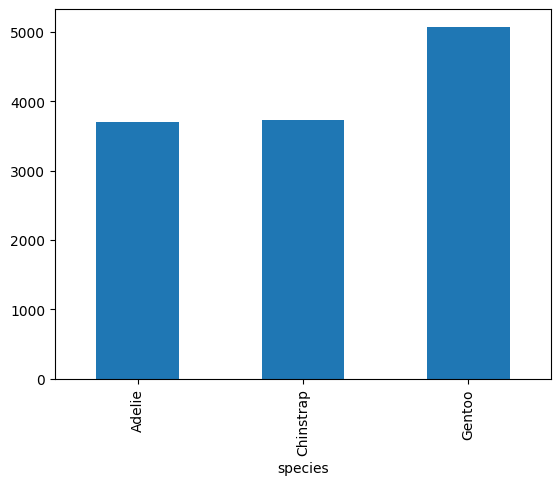

In [56]:
# group by species and then use mean() function to calculate the mean body weight for each unique species entry
avg_weight_by_species = df.groupby('species')['body_mass_g'].mean()
print(avg_weight_by_species)

# plot
avg_weight_by_species.plot.bar()


Mean, median, and mode?
- https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/mean-median-basics/a/mean-median-and-mode-review

df.describe does a cool statistics overview
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

this only includes numerics, unless told otherwise

In [39]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


heatmaps look cool, matplotlib or seaborn. uses df.corr
- https://statisticsglobe.com/plot-correlation-matrix-matplotlib-seaborn-python